# Problem 6: Random Forest for Tabular Data

In [19]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('./data/petrol_consumption.csv')

In [21]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


### Split the dataset

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

Use 'random_state' parameter to obtain reproducible output across multiple function calls:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scale the dataset

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

### Train the model

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [30]:
rf = RandomForestRegressor(random_state=0)

In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [32]:
y_pred = rf.predict(X_test)

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 47.972999999999985
Mean Squared Error: 3618.161269999999
Root Mean Squared Error: 60.151153521773786


## Determine the optimal number of subtrees

In [55]:
n_estimators_list = []
rmse_list = []

In [56]:
for n_estimators in range(1, 201, 10):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    n_estimators_list.append(n_estimators)
    rmse_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

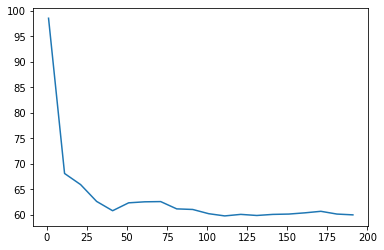

In [61]:
plt.plot(n_estimators_list, rmse_list, '-');

In [59]:
min_n_estimators = None
min_rmse = None

for (n_estimators, rmse) in zip(n_estimators_list, rmse_list):
    if min_rmse == None or rmse < min_rmse:
        min_n_estimators = n_estimators
        min_rmse = rmse

In [60]:
print(f'Optimal number of estimators is: {min_n_estimators}, with RMSE = {min_rmse}')

Optimal number of estimators is: 111, with RMSE = 59.75753643230077


## Criterion parameter values

- Instead of using default MSE, use MAE (Mean Absolute Error):

In [63]:
n_estimators_list = []
rmse_list = []

for n_estimators in range(1, 201, 10):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42, criterion='mae')
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    n_estimators_list.append(n_estimators)
    rmse_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

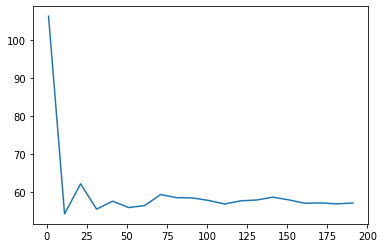

In [64]:
plt.plot(n_estimators_list, rmse_list, '-');

In [66]:
min_n_estimators = None
min_rmse = None

for (n_estimators, rmse) in zip(n_estimators_list, rmse_list):
    if min_rmse == None or rmse < min_rmse:
        min_n_estimators = n_estimators
        min_rmse = rmse

In [67]:
print(f'Optimal number of estimators is: {min_n_estimators}, with RMSE = {min_rmse}')

Optimal number of estimators is: 11, with RMSE = 54.18843766763814


- MAE gives us a slightly better result, with less number of estimators

## Find important features

In [120]:
import matplotlib.pyplot as plt

In [121]:
importances = rf.feature_importances_

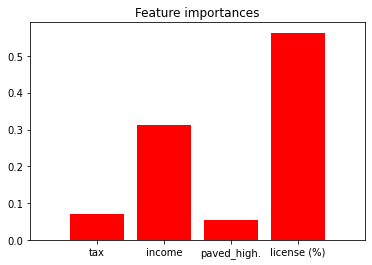

In [130]:
indices = [0, 1, 2, 3]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), ['tax', 'income', 'paved_high.', 'license (%)'])
plt.xlim([-1, X.shape[1]])
plt.show()

The 'Population_Driver_licence(%)' turns out to be the most important variable.